
# Youtube Comment Sentiment Analysis



Fetching Youtube comments

In [2]:
import pandas as pd
from googleapiclient.discovery import build
import csv
import os

In [ ]:
API_KEY = "YOUR_YOUTUBE_API_KEY"
youtube = build("youtube", "v3", developerKey=API_KEY)

In [39]:
VIDEO_IDS = ['xiFsAjUDwdU', 'f3WFSL36oZo', 'tGcVu2noaUU', 'SJYQNRNzVkI', 'sQ5DCwcpMy0', 'ekWc5TlNjK4', 'q9leDzlNEaY', 'gDjaFLxc__k', 'WX1kvn9YHVQ', '5wenj2_oOeg', 'EomJuxTeRm4', 'iPSP_j-QyX4', 'mSVgntFl-1k', 'PTKPOCBMo5c', '6XBoo2OfLGg', '43yyNypLixI', 'H4H99b1CjPU', 'jcObbfm5_1g', 'eZE4qot1Quk', 'uakLypgccbI', 'md0T03T_0Tg', 'QZfH7cFp3Ys', 'tneJeYmw0J4', 'tzXmzKQWmTM', 'WsK-KPi_w3w', 'jsR3XYk_rGY', 'pB9jEYO2oaA', 'mjzhf0aXXEg', 'kWtmIfcWeZo', 'RwuITNzKr8g', '4WMZRXaNReo', 'Cl9xfQjtbiM', 'qqLej3URBRM', 'lMeyNE6a_SA', 'NBZgirj_C2Y', 'NkZgkvDlJuU', 'aSBa1vJ7Zr4', 'faL_S-7z4_I', 'eB5ZuCWyC6A', 'n3vgkJj4NrU', '7hQ8DpeKzZE', '7D-WpFCmvRA', '2rOftxJBa_g', 'k26OTjEK6Vw', 'Ra9EJu0GtHc', 'VExHTj95hIo', 'E3lN0tAufX4', 't3s2lAtGncU', 'GGuLAZG-ll0', '0hhR3f_1qGA']
MAX_COMMENTS = 500

In [40]:
print('Size:',len(VIDEO_IDS),'\nIDs:',VIDEO_IDS)

Size: 50 
IDs: ['xiFsAjUDwdU', 'f3WFSL36oZo', 'tGcVu2noaUU', 'SJYQNRNzVkI', 'sQ5DCwcpMy0', 'ekWc5TlNjK4', 'q9leDzlNEaY', 'gDjaFLxc__k', 'WX1kvn9YHVQ', '5wenj2_oOeg', 'EomJuxTeRm4', 'iPSP_j-QyX4', 'mSVgntFl-1k', 'PTKPOCBMo5c', '6XBoo2OfLGg', '43yyNypLixI', 'H4H99b1CjPU', 'jcObbfm5_1g', 'eZE4qot1Quk', 'uakLypgccbI', 'md0T03T_0Tg', 'QZfH7cFp3Ys', 'tneJeYmw0J4', 'tzXmzKQWmTM', 'WsK-KPi_w3w', 'jsR3XYk_rGY', 'pB9jEYO2oaA', 'mjzhf0aXXEg', 'kWtmIfcWeZo', 'RwuITNzKr8g', '4WMZRXaNReo', 'Cl9xfQjtbiM', 'qqLej3URBRM', 'lMeyNE6a_SA', 'NBZgirj_C2Y', 'NkZgkvDlJuU', 'aSBa1vJ7Zr4', 'faL_S-7z4_I', 'eB5ZuCWyC6A', 'n3vgkJj4NrU', '7hQ8DpeKzZE', '7D-WpFCmvRA', '2rOftxJBa_g', 'k26OTjEK6Vw', 'Ra9EJu0GtHc', 'VExHTj95hIo', 'E3lN0tAufX4', 't3s2lAtGncU', 'GGuLAZG-ll0', '0hhR3f_1qGA']


In [41]:
def get_comments(youtube, video_id, max_comments=500):
    comments = []
    next_page_token = None

    while len(comments) < max_comments:
        response = youtube.commentThreads().list(
            part="snippet",
            videoId=video_id,
            maxResults=100,
            pageToken=next_page_token,
            textFormat="plainText"
        ).execute()

        for item in response["items"]:
            comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
            comments.append(comment)
            if len(comments) >= max_comments:
                break

        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break

    return comments


In [ ]:
all_comments = []


for vid in VIDEO_IDS:
    try:
        comments = get_comments(youtube, vid, max_comments=500)
        all_comments.extend(comments)
        print(f"✅ Fetched {len(comments)} from {vid} — Total: {len(all_comments)}")
        if len(all_comments) >= 10000:
            break
    except Exception as e:
        print(f"Error with video {vid}: {e}")


✅ Fetched 500 from xiFsAjUDwdU — Total: 500
✅ Fetched 500 from f3WFSL36oZo — Total: 1000
✅ Fetched 500 from tGcVu2noaUU — Total: 1500
✅ Fetched 500 from SJYQNRNzVkI — Total: 2000
✅ Fetched 500 from sQ5DCwcpMy0 — Total: 2500
✅ Fetched 500 from ekWc5TlNjK4 — Total: 3000
✅ Fetched 500 from q9leDzlNEaY — Total: 3500
✅ Fetched 500 from gDjaFLxc__k — Total: 4000
✅ Fetched 500 from WX1kvn9YHVQ — Total: 4500
✅ Fetched 500 from 5wenj2_oOeg — Total: 5000
✅ Fetched 152 from EomJuxTeRm4 — Total: 5152
✅ Fetched 500 from iPSP_j-QyX4 — Total: 5652
✅ Fetched 500 from mSVgntFl-1k — Total: 6152
✅ Fetched 500 from PTKPOCBMo5c — Total: 6652
✅ Fetched 48 from 6XBoo2OfLGg — Total: 6700
✅ Fetched 500 from 43yyNypLixI — Total: 7200
✅ Fetched 500 from H4H99b1CjPU — Total: 7700
✅ Fetched 88 from jcObbfm5_1g — Total: 7788
✅ Fetched 500 from eZE4qot1Quk — Total: 8288
✅ Fetched 180 from uakLypgccbI — Total: 8468
✅ Fetched 500 from md0T03T_0Tg — Total: 8968
✅ Fetched 500 from QZfH7cFp3Ys — Total: 9468
✅ Fetched 500

In [ ]:
print("Data Size:",len(all_comments),"\nFetched Comments:",all_comments)

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Preprocessing Dataset

In [49]:
import re


In [ ]:
def clean_comment(text):
    text = text.strip()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) # remove URLs
    text = re.sub(r'@\w+', '', text) # remove mentions
    text = re.sub(r'#\w+', '', text) # remove hashtags
    text = re.sub(r"\s+", " ", text) # normalize whitespace
    return text

In [52]:
clean_comment = [clean_comment(c) for c in all_comments]

Labeling comments using j-hartmann/emotion-english-distilroberta-base

In [55]:
from transformers import pipeline
from tqdm import tqdm

In [56]:
emotion_classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", truncation=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [58]:
labeled = []
for comment in tqdm(clean_comment):
    try:
        result = emotion_classifier(comment[:512])[0]
        labeled.append({
            "comment": comment,
            "label": result["label"],
            "score": result["score"]
        })
    except:
        continue

df = pd.DataFrame(labeled)
df.to_csv("labeled_youtube_emotions.csv", index=False)
df.head()

100%|██████████| 10468/10468 [13:37<00:00, 12.80it/s]


,comment,label,score
0,Subscribe and you might just race for a lambo :),neutral,0.956268
1,اريد المشاركة,neutral,0.474828
2,I didn t expect to love this as much as I do,surprise,0.902146
3,انا مشترك يا مستر بيست وانا من الجزاءر ارجوك ا...,anger,0.354760
4,Who else is here before this blows up,neutral,0.440951


In [59]:
df.to_csv('/content/drive/MyDrive/youtubesentiment/comments.csv', index=False)

In [5]:
file_path = "/content/drive/MyDrive/youtubesentiment/comments.csv"
df = pd.read_csv(file_path)

In [6]:
filtered_df = df[df["score"] >= 0.7]

In [7]:
filtered_df.head()

,comment,label,score
0,Subscribe and you might just race for a lambo :),neutral,0.956268
2,I didn t expect to love this as much as I do,surprise,0.902146
5,This video randomly popped up and I m glad it did,joy,0.865352
6,This gave me chills… in the best way,joy,0.957328
8,I didn t expect to love this as much as I do,surprise,0.902146


In [8]:
filtered_df.describe()

,score
count,6138.000000
mean,0.859034
std,0.077384
min,0.700014
25%,0.785085
50%,0.867820
75%,0.922545
max,0.994040


In [9]:
len(filtered_df)

6138

In [10]:
dataset=filtered_df #Final dataset with confindence value>0.7 for increased accuracy in fine tuning

Fine tuning DistilRoBERTa

In [11]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [12]:
dataset = dataset.drop(columns=["score"])
dataset

,comment,label
0,Subscribe and you might just race for a lambo :),neutral
2,I didn t expect to love this as much as I do,surprise
5,This video randomly popped up and I m glad it did,joy
6,This gave me chills… in the best way,joy
8,I didn t expect to love this as much as I do,surprise
...,...,...
10459,16:30 to 17:34 is hilarious. How do I like you...,joy
10461,You know that the 82nd Airborne is the 18th Ai...,anger
10462,the 2 places i learn history fat electrician a...,joy
10465,I'm sitting here watching clips from the movie...,surprise


In [ ]:
#Encoding
le =LabelEncoder()
dataset["encoded_label"] = le.fit_transform(dataset["label"])
dataset["labels"] = dataset["encoded_label"]

hf_dataset = Dataset.from_pandas(dataset[["comment", "labels"]])
split_dataset = hf_dataset.train_test_split(test_size=0.15, seed=42)
train_dataset = split_dataset["train"]
val_dataset = split_dataset["test"]


In [ ]:
tokenizer =AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [15]:
def tokenize(batch):
    return tokenizer(batch["comment"], truncation=True, padding="max_length")

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)

Map:   0%|          | 0/5217 [00:00<?, ? examples/s]

Map:   0%|          | 0/921 [00:00<?, ? examples/s]

In [16]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(le.classes_))

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    per_device_train_batch_size=8,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="./logs",
)

In [18]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

In [19]:
trainer.train()


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: anujpersonal5 (anujpersonal5-pccoe) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,0.623500,0.495740
2,0.318500,0.513478
3,0.192400,0.554101


TrainOutput(global_step=1959, training_loss=0.3124719165063988, metrics={'train_runtime': 786.7252, 'train_samples_per_second': 19.894, 'train_steps_per_second': 2.49, 'total_flos': 2073432123472896.0, 'train_loss': 0.3124719165063988, 'epoch': 3.0})

In [20]:
trainer.evaluate(val_dataset)


{'eval_loss': 0.554101288318634,
 'eval_runtime': 13.2694,
 'eval_samples_per_second': 69.408,
 'eval_steps_per_second': 8.742,
 'epoch': 3.0}

In [25]:
from sklearn.metrics import classification_report

val_labels = val_dataset["labels"]

preds_output = trainer.predict(val_dataset)
preds = preds_output.predictions.argmax(-1)
print(classification_report(val_labels, preds, target_names=le.classes_))


              precision    recall  f1-score   support

       anger       0.88      0.64      0.74        22
     disgust       0.67      0.62      0.64        13
        fear       1.00      0.74      0.85        23
         joy       0.89      0.93      0.91       240
     neutral       0.93      0.93      0.93       472
     sadness       0.70      0.78      0.74        36
    surprise       0.86      0.84      0.85       115

    accuracy                           0.90       921
   macro avg       0.85      0.78      0.81       921
weighted avg       0.90      0.90      0.90       921



In [30]:
save_directory = "/content/drive/MyDrive/youtubesentiment/model"

trainer.save_model(save_directory)
tokenizer.save_pretrained(save_directory)


('/content/drive/MyDrive/youtubesentiment/model/tokenizer_config.json',
 '/content/drive/MyDrive/youtubesentiment/model/special_tokens_map.json',
 '/content/drive/MyDrive/youtubesentiment/model/vocab.txt',
 '/content/drive/MyDrive/youtubesentiment/model/added_tokens.json',
 '/content/drive/MyDrive/youtubesentiment/model/tokenizer.json')

In [41]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model1 = AutoModelForSequenceClassification.from_pretrained(save_directory)
tokenizer1 = AutoTokenizer.from_pretrained(save_directory)

model1 = model1.to(trainer.model.device)
model1.eval()

test_comment = "I'm crying and feeling terrible today"

inputs = tokenizer1(test_comment, return_tensors="pt", truncation=True, padding=True)
inputs = {k: v.to(trainer.model.device) for k, v in inputs.items()}

with torch.no_grad():
    outputs = model1(**inputs)
    pred_class = torch.argmax(outputs.logits, dim=1).item()

label_classes = ['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'surprise']
print(f"Predicted sentiment: {label_classes[pred_class]}")


Predicted sentiment: fear


In [34]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

preds_output = trainer.predict(val_dataset)
preds = np.argmax(preds_output.predictions, axis=1)
true_labels = val_dataset['labels']
true_labels = le.inverse_transform(val_dataset['labels'])
preds = le.inverse_transform(preds)
print("📊 Classification Report:")
print(classification_report(true_labels, preds, target_names=le.classes_))

accuracy = accuracy_score(true_labels, preds)
precision = precision_score(true_labels, preds, average='weighted')
recall = recall_score(true_labels, preds, average='weighted')
f1 = f1_score(true_labels, preds, average='weighted')

print("\n📈 Individual Metrics:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"🎯 Precision: {precision:.4f}")
print(f"🔁 Recall:    {recall:.4f}")
print(f"🏆 F1 Score:  {f1:.4f}")


📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.88      0.64      0.74        22
     disgust       0.67      0.62      0.64        13
        fear       1.00      0.74      0.85        23
         joy       0.89      0.93      0.91       240
     neutral       0.93      0.93      0.93       472
     sadness       0.70      0.78      0.74        36
    surprise       0.86      0.84      0.85       115

    accuracy                           0.90       921
   macro avg       0.85      0.78      0.81       921
weighted avg       0.90      0.90      0.90       921


📈 Individual Metrics:
✅ Accuracy:  0.8979
🎯 Precision: 0.8991
🔁 Recall:    0.8979
🏆 F1 Score:  0.8974


In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
preds_output = trainer.predict(val_dataset)
preds = np.argmax(preds_output.predictions, axis=1)
true_labels = val_dataset["labels"]

true_labels = le.inverse_transform(true_labels)
preds = le.inverse_transform(preds)

label_names = le.classes_


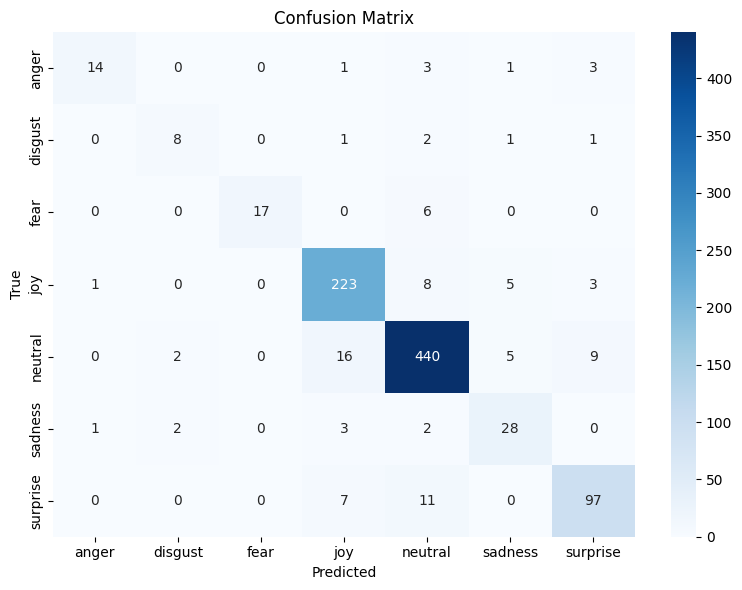

In [44]:
cm = confusion_matrix(true_labels, preds, labels=label_names)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


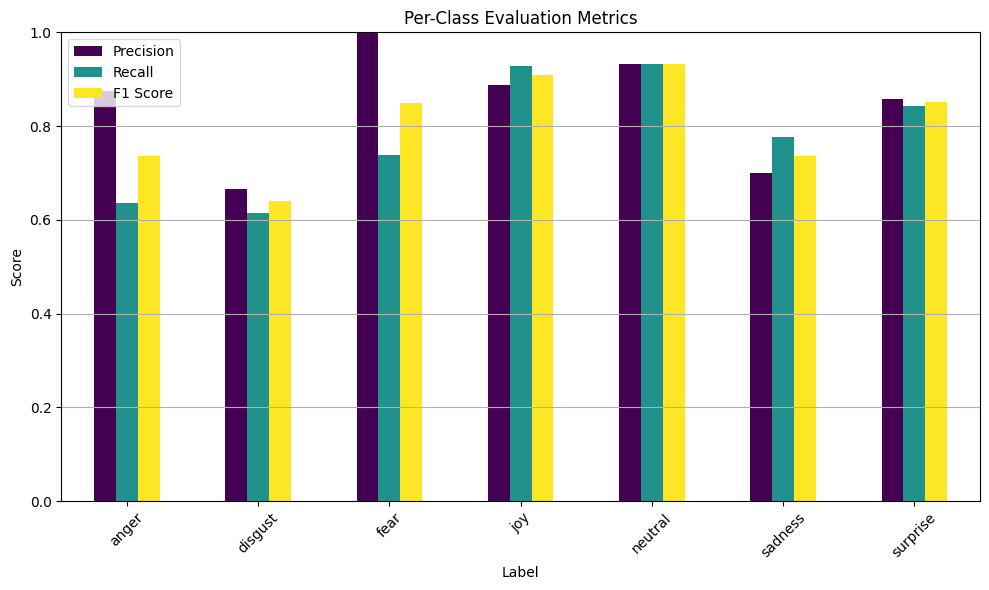

In [45]:
precisions, recalls, f1s, _ = precision_recall_fscore_support(true_labels, preds, labels=label_names)

metrics_df = pd.DataFrame({
    'Label': label_names,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1s
})

metrics_df.set_index('Label').plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap="viridis")
plt.title("Per-Class Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [46]:
acc = accuracy_score(true_labels, preds)
print(f"Overall Accuracy: {acc:.4f}")


Overall Accuracy: 0.8979
